In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Tetuan_City_power_consumption.csv')
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [4]:
df['Total_Consumption'] = df['Zone 1 Power Consumption']+df['Zone 2  Power Consumption']+df['Zone 3  Power Consumption']

In [5]:
df.tail()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Total_Consumption
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,72798.08659
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,70983.80786
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,68675.04965
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,67163.01682
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820,65750.53976


In [6]:
df.dtypes

DateTime                      object
Temperature                  float64
Humidity                     float64
Wind Speed                   float64
general diffuse flows        float64
diffuse flows                float64
Zone 1 Power Consumption     float64
Zone 2  Power Consumption    float64
Zone 3  Power Consumption    float64
Total_Consumption            float64
dtype: object

In [7]:
df[df.DateTime.str.contains('2/28/2017 23:50')]

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Total_Consumption
8495,2/28/2017 23:50,13.31,67.29,0.085,0.055,0.167,29843.38983,18474.16413,18020.98492,66338.53888
52127,12/28/2017 23:50,13.23,55.51,0.077,0.066,0.119,28167.30038,24117.82755,12227.61104,64512.73897


In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [9]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Total_Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218,71222.885864
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099,17143.138964
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,36785.039739
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630,56499.074640
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470,69788.790940
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420,83749.172310
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360,134208.145950


In [10]:
dti = pd.date_range("2017-01-01", periods=365, freq="D")
print(dti)
df[df['DateTime']< dti[0]+pd.Timedelta("1 day")]

df[df['DateTime']< dti[0]+pd.Timedelta("1 day")]['Total_Consumption'].mean()

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')


64071.81853444445

In [11]:
new_df = pd.DataFrame({
    'Month': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    'Avg_consumption': [df[df['DateTime']< dti[0]+pd.Timedelta("1 day")]['Total_Consumption'].mean(),
                        df[df['DateTime']< dti[1]+pd.Timedelta("1 day")]['Total_Consumption'].mean(),
                        df[df['DateTime']< dti[2]+pd.Timedelta("1 day")]['Total_Consumption'].mean(),
                        df[df['DateTime']< dti[3]+pd.Timedelta("1 day")]['Total_Consumption'].mean(),
                        df[df['DateTime']< dti[4]+pd.Timedelta("1 day")]['Total_Consumption'].mean(),
                        df[df['DateTime']< dti[5]+pd.Timedelta("1 day")]['Total_Consumption'].mean(),
                        df[df['DateTime']< dti[6]+pd.Timedelta("1 day")]['Total_Consumption'].mean(),
                        df[df['DateTime']< dti[7]+pd.Timedelta("1 day")]['Total_Consumption'].mean(),
                        df[df['DateTime']< dti[8]+pd.Timedelta("1 day")]['Total_Consumption'].mean(),
                        df[df['DateTime']< dti[9]+pd.Timedelta("1 day")]['Total_Consumption'].mean(),
                        df[df['DateTime']< dti[10]+pd.Timedelta("1 day")]['Total_Consumption'].mean(),
                        df[df['DateTime']< dti[11]+pd.Timedelta("1 day")]['Total_Consumption'].mean()]
}
)

In [12]:
a_df = pd.DataFrame({
    'Day' : [i for i in range(1,366)],
    'AvgC' : [df[df['DateTime']< dti[i]+pd.Timedelta("1 day")]['Total_Consumption'].mean()
    for i in range(365)]
})

In [13]:
a_df

,Day,AvgC
0,1,64071.818534
1,2,65159.900344
2,3,66186.773554
3,4,66756.480916
4,5,67105.390600
...,...,...
360,361,71274.796867
361,362,71260.278872
362,363,71243.010121
363,364,71222.885864


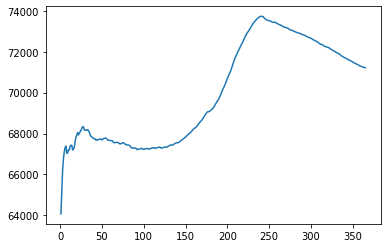

In [14]:
import matplotlib.pyplot as plt

plt.plot(a_df['Day'],a_df['AvgC'])

In [15]:
new_df

,Month,Avg_consumption
0,Jan,64071.818534
1,Feb,65159.900344
2,Mar,66186.773554
3,Apr,66756.480916
4,May,67105.390600
5,Jun,67310.006766
6,Jul,67387.302343
7,Aug,67037.844881
8,Sep,67040.381958
9,Oct,67205.733861


In [16]:
conditions = [
    df['DateTime']< dti[0]+pd.Timedelta("1 day"),
    df['DateTime']< dti[1]+pd.Timedelta("1 day"),
    df['DateTime']< dti[2]+pd.Timedelta("1 day"),
    df['DateTime']< dti[3]+pd.Timedelta("1 day"),
    df['DateTime']< dti[4]+pd.Timedelta("1 day"),
    df['DateTime']< dti[5]+pd.Timedelta("1 day"),
    df['DateTime']< dti[6]+pd.Timedelta("1 day"),
    df['DateTime']< dti[7]+pd.Timedelta("1 day"),
    df['DateTime']< dti[8]+pd.Timedelta("1 day"),
    df['DateTime']< dti[9]+pd.Timedelta("1 day"),
    df['DateTime']< dti[10]+pd.Timedelta("1 day"),
    df['DateTime']< dti[11]+pd.Timedelta("1 day")
]

values = [1,2,3,4,5,6,7,8,9,10,11,12]

df['state'] = np.select(conditions,values)

In [17]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Total_Consumption,state
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627,1


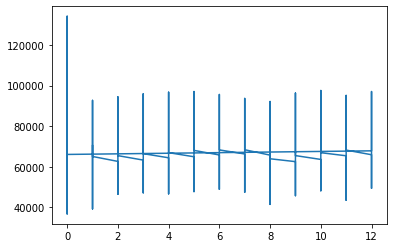

In [18]:
import matplotlib.pyplot as plt


plt.plot(df['state'], df['Total_Consumption'])

<Figure size 9600x7200 with 0 Axes>

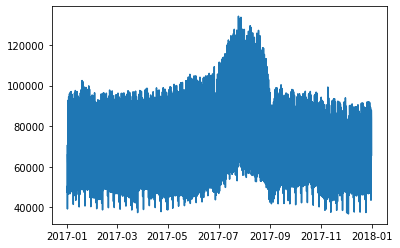

<Figure size 9600x7200 with 0 Axes>

In [19]:
plt.plot(df['DateTime'], df['Total_Consumption'])
#plt.plot(df['DateTime'], df['Zone 1 Power Consumption'])
#plt.plot(df['DateTime'], df['Zone 2  Power Consumption'])
#plt.plot(df['DateTime'], df['Zone 3  Power Consumption'])
plt.figure(figsize=(80,60),dpi=120)

In [20]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Total_Consumption,state
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218,71222.885864,0.214286
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099,17143.138964,1.319026
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,36785.039739,0.000000
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630,56499.074640,0.000000
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470,69788.790940,0.000000
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420,83749.172310,0.000000
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360,134208.145950,12.000000


In [21]:
df.nunique()

DateTime                     52416
Temperature                   3437
Humidity                      4443
Wind Speed                     548
general diffuse flows        10504
diffuse flows                10449
Zone 1 Power Consumption     27709
Zone 2  Power Consumption    29621
Zone 3  Power Consumption    22838
Total_Consumption            52416
state                           13
dtype: int64

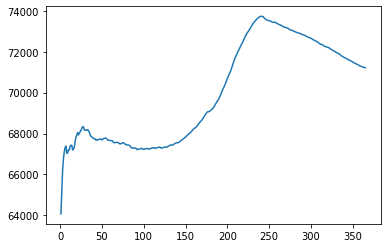

In [22]:
plt.plot(a_df['Day'],a_df['AvgC'] )

In [23]:
a_df.describe()

,Day,AvgC
count,365.000000,365.000000
mean,183.000000,69971.119547
std,105.510663,2458.979363
min,1.000000,64071.818534
25%,92.000000,67560.836907
50%,183.000000,69244.519352
75%,274.000000,72431.503470
max,365.000000,73734.564706


In [24]:
minimum = min(df['Total_Consumption'])
maximum = max(df['Total_Consumption'])
states = (maximum - minimum)/9
print(states)

10824.789579


In [25]:
conditions = [
    (df['Total_Consumption']< minimum+states) & (df['Total_Consumption']>= minimum),
    (df['Total_Consumption']< minimum+2*states) & (df['Total_Consumption']>= minimum+1*states),
    (df['Total_Consumption']< minimum+3*states) & (df['Total_Consumption']>= minimum+2*states),
    (df['Total_Consumption']< minimum+4*states) & (df['Total_Consumption']>= minimum+3*states),
    (df['Total_Consumption']< minimum+5*states) & (df['Total_Consumption']>= minimum+4*states),
    (df['Total_Consumption']< minimum+6*states) & (df['Total_Consumption']>= minimum+5*states),
    (df['Total_Consumption']< minimum+7*states) & (df['Total_Consumption']>= minimum+6*states),
    (df['Total_Consumption']< minimum+8*states) & (df['Total_Consumption']>= minimum+7*states),
    (df['Total_Consumption']< minimum+9*states) & (df['Total_Consumption']>= minimum+8*states),
    
]

values = [0,1,2,3,4,5,6,7,8]

df['state'] = np.select(conditions,values)

In [26]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Total_Consumption,state
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544,3
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387,3
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193,2
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209,2
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627,2


In [27]:

df['state'].value_counts()


1    12487
3    12155
2    10684
5     6483
4     6335
0     2259
6     1159
7      635
8      219
Name: state, dtype: int64

In [28]:
dfp = pd.DataFrame({
    'state' : [0,1,2,3,4,5,6,7,8],
    'frequency' : [2259, 12487, 10684, 12155, 6335, 6483, 1159, 635, 219]
})

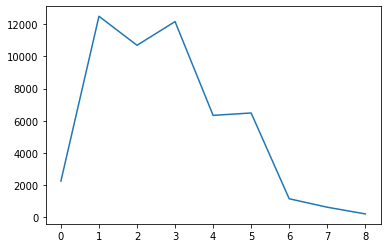

In [29]:
plt.plot(dfp['state'],dfp['frequency'])

<Figure size 720x7200 with 0 Axes>

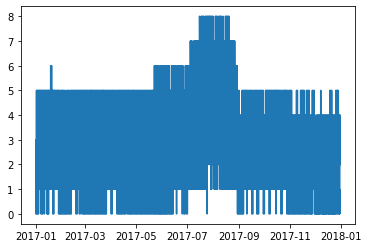

<Figure size 720x7200 with 0 Axes>

In [30]:
plt.plot(df['DateTime'],df['state'])
plt.figure(figsize=(10,100))

In [31]:
df.shape

(52416, 11)

In [32]:
def compute_transition_matrix_fast(data, n, step = 1): 
      t = np.array(data)
      step = step
      total_inds = t.size - (step + 1) + 1
      t_strided = np.lib.stride_tricks.as_strided(
                                      t,
                                      shape = (total_inds, 2),
                                      strides = (t.strides[0], step * t.strides[0]))
      inds, counts = np.unique(t_strided, axis = 0, return_counts = True)
      P = np.zeros((n, n))
      N = np.zeros((n, n))
      P[inds[:, 0], inds[:, 1]] = counts
      N[inds[:, 0], inds[:, 1]] = counts
      sums = P.sum(axis = 1)
      P[sums != 0] = P[sums != 0] / sums[sums != 0][:, None] 
      return P, N

In [33]:
compute_transition_matrix_fast(df['state'],9)

(array([[8.83134130e-01, 1.16423196e-01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         4.42673749e-04],
        [2.10619044e-02, 9.48906863e-01, 3.00312325e-02, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 3.50088926e-02, 9.12758588e-01, 5.22325190e-02,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 8.22706705e-05, 4.59070341e-02, 9.22007404e-01,
         3.20032908e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.14048934e-02,
         8.79400158e-01, 5.91949487e-02, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         5.78435909e-02, 9.23029462e-01, 1.91269474e-02, 0.00000000

In [34]:
def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M


In [35]:
transition_mtx = np.array(transition_matrix(df['state']))
x = pd.DataFrame(transition_mtx**2)
x

,0,1,2,3,4,5,6,7,8
0,0.779926,1.355436e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.959600e-07
1,0.000444,9.004242e-01,0.000902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,0.000000,1.225623e-03,0.833128,0.002728,0.000000,0.000000,0.000000,0.000000,0.000000e+00
3,0.000000,6.768463e-09,0.002107,0.850098,0.001024,0.000000,0.000000,0.000000,0.000000e+00
4,0.000000,0.000000e+00,0.000000,0.003771,0.773345,0.003504,0.000000,0.000000,0.000000e+00
5,0.000000,0.000000e+00,0.000000,0.000000,0.003346,0.851983,0.000366,0.000000,0.000000e+00
6,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.011447,0.717887,0.002091,0.000000e+00
7,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.006966,0.758408,2.085684e-03
8,0.000021,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.017535,7.447926e-01


In [36]:
def compute_stationary_distribution(P):
    A = np.vstack((P.T - np.identity(P.shape[0]), np.ones((P.shape[0])))) # print(A.shape)
    b = np.zeros((P.shape[0] + 1, 1))
    # print(b.shape)
    # print(b)
    b[-1] = 1
    # print(b)
    # display(sp.Matrix(A))
    return np.linalg.lstsq(A, b)[0]

In [37]:
st_mtx = compute_stationary_distribution(transition_mtx)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


In [38]:
st_mtx

array([[0.04313733],
       [0.23845032],
       [0.20400321],
       [0.23169808],
       [0.12075801],
       [0.12357974],
       [0.0220933 ],
       [0.01210499],
       [0.00417503]])

In [39]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

<Figure size 720x7200 with 0 Axes>

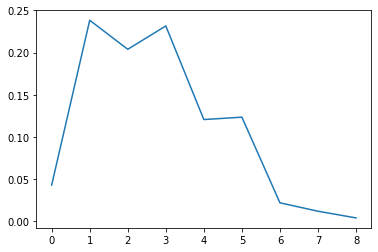

<Figure size 720x7200 with 0 Axes>

In [40]:
plt.plot([0,1,2,3,4,5,6,7,8],st_mtx)

plt.figure(figsize=(10,100))

In [41]:
def simulate_multinomial(vmultinomial):
  r=np.random.uniform(0.0, 1.0)
  CS=np.cumsum(vmultinomial)
  CS=np.insert(CS,0,0)
  m=(np.where(CS<r))[0]
  nextState=m[len(m)-1]
  return nextState

In [42]:
#simulate markov chain
import numpy as np
curr_state = 4
n=52415
model = np.array([0])
prev_state = curr_state
while n>0:
  curr_state=np.random.choice([0,1,2,3,4,5,6,7,8],p=transition_mtx[prev_state])
  model=np.vstack((model,curr_state))
  prev_state = curr_state
  n-=1


<Figure size 5760x4320 with 0 Axes>

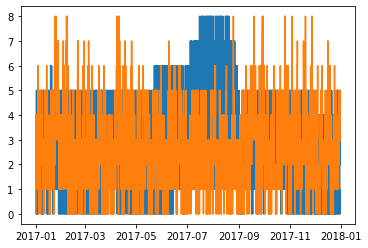

<Figure size 5760x4320 with 0 Axes>

In [43]:
plt.plot(df['DateTime'],df['state'])
plt.plot(df['DateTime'],model)
plt.figure(figsize=(80,60))

In [44]:
simulated_df = pd.DataFrame(model)
simulated_df.value_counts()

3    12981
1    11853
2    11241
5     6296
4     6210
0     2344
6      928
7      475
8       88
dtype: int64

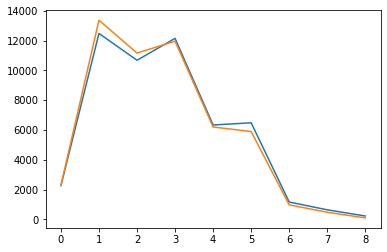

In [45]:
simulated_pp = {
    'state': [0,1,2,3,4,5,6,7,8],
    'frequency': [2285,13373,11169,11963,6201,5894,970,471,91]

}
plt.plot(dfp['state'],dfp['frequency'])
plt.plot(simulated_pp['state'],simulated_pp['frequency'])

In [46]:
from scipy.stats import chi2
def compute_test_statistic(N, Q, i):
    n, N2 = N.shape[0], N[i][Q[i] > 0]
    S = N2.sum()
    ch2 = chi2.ppf(q = 0.95, df = len(N2) - 1) 
    ts = 0.0
    # print(n, S)
    if S > 0:
      for j in range(n): 
        if Q[i][j] > 0:
          observed = N[i][j]
          expected = S * Q[i][j]
          ts += ((observed - expected)**2 / expected)
    return ch2, ts

In [47]:

def get_observed(N):
  observed = np.zeros((9,9))
  for i in range(len(N)-2):
    observed[N[i],N[i+2]] += 1
  return observed

In [48]:
ob = get_observed(df['state'])
pd.DataFrame(ob)

,0,1,2,3,4,5,6,7,8
0,1768.0,490.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,490.0,11260.0,737.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,736.0,8889.0,1049.0,8.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1058.0,10338.0,725.0,33.0,0.0,0.0,0.0
4,0.0,0.0,0.0,766.0,4891.0,674.0,4.0,0.0,0.0
5,0.0,0.0,0.0,0.0,711.0,5550.0,204.0,18.0,0.0
6,0.0,0.0,0.0,0.0,0.0,226.0,846.0,81.0,6.0
7,0.0,0.0,0.0,0.0,0.0,0.0,105.0,480.0,50.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,162.0


In [49]:
expected = np.zeros((9,9))

for i in range(len(expected)):
  for j in range(len(expected)):
    pk = 0
    for k in range(9):
      pk = pk + (transition_mtx[i,k]* transition_mtx[k,j])
    expected[i,j] = ob[i].sum() * pk
pd.DataFrame(expected)

,0,1,2,3,4,5,6,7,8
0,1767.396437,481.826781,7.898214,0.000000,0.000000,0.000000,0.000000,0.132420,1.746148
1,481.826781,11287.345057,698.124544,19.587195,0.000000,0.000000,0.000000,0.000000,0.116423
2,7.876415,696.243607,8936.320224,1023.703590,17.856165,0.000000,0.000000,0.000000,0.000000
3,0.021062,21.405876,1023.829455,10385.969230,700.747542,23.026835,0.000000,0.000000,0.000000
4,0.000000,0.032003,17.857836,700.747542,4933.278906,675.911107,7.172605,0.000000,0.000000
5,0.000000,0.000000,0.000000,23.026835,675.911107,5558.873014,219.518639,5.670406,0.000000
6,0.000000,0.000000,0.000000,0.000000,7.172605,219.518639,838.826425,91.061859,2.420472
7,0.132420,0.000000,0.000000,0.000000,0.000000,5.670406,91.061859,487.852800,50.282515
8,1.746148,0.116423,0.000000,0.000000,0.000000,0.000000,2.420472,50.282515,164.434441


In [63]:
x=0
p=0
for i in range(9):
  for j in range(9):
    if expected[i,j]>0 and ob[i,j]>0:
      x=x+(((ob[i,j]- expected[i,j])**2)/expected[i,j])
      p=p+1
print(x,p)

84.90073007673742 33


In [68]:
z=0

for i in range(9):
  z=0
  q=0
  for j in range(9):
    
    if expected[i,j]>0 and ob[i,j]>0:
      z=z+(((ob[i,j]- expected[i,j])**2)/expected[i,j])
      q=q+1
    
  print(i,z,q,chi2.ppf(q=0.95,df=q-1))

0 0.45768530151990905 3 5.991464547107979
1 2.3696905926945813 3 5.991464547107979
2 8.586166308535908 4 7.814727903251179
3 25.973441862485693 5 9.487729036781154
4 7.847256366773862 4 7.814727903251179
5 29.741999121192116 4 7.814727903251179
6 6.658096874927187 4 7.814727903251179
7 2.2613956429450317 3 5.991464547107979
8 1.0049980056631287 3 5.991464547107979


In [52]:
N = np.matmul(ob,np.ones((9,1)))
N

array([[ 2259.],
       [12487.],
       [10682.],
       [12155.],
       [ 6335.],
       [ 6483.],
       [ 1159.],
       [  635.],
       [  219.]])

In [53]:
def get_expected(N):
  observed = np.zeros((9,9))
  for i in range(len(N)-2):
    observed[N[i],N[i+1]] += 1
  return observed



In [54]:
ex = get_expected(df['state'])

In [55]:
sim = np.matmul(ex,np.ones((9,1)))
sim

array([[ 2259.],
       [12487.],
       [10682.],
       [12155.],
       [ 6335.],
       [ 6483.],
       [ 1159.],
       [  635.],
       [  219.]])

In [56]:
test_stat_data = np.hstack((sim,N))

In [57]:
test_stat_data.shape[0]

9

In [58]:
#Chi2 test
x=[]
chi = 0
for i in range(test_stat_data.shape[0]):
  chi =  (((test_stat_data[i,1]-test_stat_data[i,0])**2)/(test_stat_data[i,0]))
  print(chi)
  x.append(chi)
print(chi)


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [64]:
critical_value = chi2.ppf(q=0.95,df=32)
critical_value

46.19425952027847

In [60]:
p_value = 1 - chi2.cdf(x=chi,df=8)
p_value

1.0

In [61]:
for i in range(0,9):
  print(chi2.ppf(q=0.95,df=i))

nan
3.841458820694124
5.991464547107979
7.814727903251179
9.487729036781154
11.070497693516351
12.591587243743977
14.067140449340169
15.50731305586545
